# Machine Learning Experiments

## KNN Classifier

### Import libraries

In [1]:
import pandas as pd
from sklearn import metrics as mt
from sklearn.neighbors import KNeighborsClassifier 
from sklearn import tree as tr
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from matplotlib import pyplot as plt
import numpy as np
import warnings
from sklearn.exceptions import DataConversionWarning

# Ignorando avisos de conversão de dados
warnings.filterwarnings(action='ignore', category=DataConversionWarning)

### Load datasets

In [2]:
X_train = pd.read_csv('./X_training.csv')
X_test = pd.read_csv('./X_test.csv')
X_val = pd.read_csv('./X_validation.csv')
y_train = pd.read_csv('./y_training.csv')
y_test = pd.read_csv('./y_test.csv')
y_val = pd.read_csv('./y_validation.csv')

In [3]:
X_train.head(3)

,id,customer_type,age,class,flight_distance,inflight_wifi_service,departure_arrival_time_convenient,ease_of_online_booking,gate_location,food_and_drink,...,baggage_handling,checkin_service,inflight_service,cleanliness,departure_delay_in_minutes,arrival_delay_in_minutes,gender_Female,gender_Male,type_of_travel_business_travel,type_of_travel_personal_travel
0,13508,1,0.500000,0.0,0.039580,0.6,0.6,0.6,0.6,1.0,...,0.5,1.0,0.6,0.4,0.0,0.013848,1.0,0.0,1.0,0.0
1,28874,1,0.243590,0.0,0.205775,0.6,0.4,0.4,0.4,0.6,...,0.5,0.5,0.2,0.6,0.0,0.000000,0.0,1.0,1.0,0.0
2,21484,0,0.435897,1.0,0.026858,0.6,0.6,0.6,0.2,1.0,...,0.0,1.0,0.6,1.0,0.0,0.000000,1.0,0.0,1.0,0.0


### Pre-processing

In [4]:
# Observing data information
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 72515 entries, 0 to 72514
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 72515 non-null  int64  
 1   customer_type                      72515 non-null  int64  
 2   age                                72515 non-null  float64
 3   class                              72515 non-null  float64
 4   flight_distance                    72515 non-null  float64
 5   inflight_wifi_service              72515 non-null  float64
 6   departure_arrival_time_convenient  72515 non-null  float64
 7   ease_of_online_booking             72515 non-null  float64
 8   gate_location                      72515 non-null  float64
 9   food_and_drink                     72515 non-null  float64
 10  online_boarding                    72515 non-null  float64
 11  seat_comfort                       72515 non-null  flo

In [5]:
# Remove the ID column from the datasets as it is not a categorical column

X_train = X_train.drop(['id'] , axis =1)
X_test = X_test.drop(['id'] , axis =1)
X_val = X_val.drop(['id'] , axis =1)

### Training dataset

In [6]:
# Define the lists of values
k_values = np.arange(3, 21, 2)

# Lists to store the results
results_knn = []

for k in k_values:
    
    # Instantiate the KNN Classifier with the current n_neighbors values
    knn_classifier = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model with the training data
    knn_classifier.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred_knn = knn_classifier.predict(X_train)
    
    # Calculate the evaluation metrics and round to 3 decimal places
    train_accuracy_knn = round(mt.accuracy_score(y_train, y_train_pred_knn), 3)
    train_precision_knn = round(mt.precision_score(y_train, y_train_pred_knn), 3)
    train_recall_knn = round(mt.recall_score(y_train, y_train_pred_knn), 3)
    train_f1_knn = round(mt.f1_score(y_train, y_train_pred_knn), 3)
    
    # Store the results in a list
    results_knn.append({
        'k': k,
        'Accuracy': train_accuracy_knn,
        'Precision': train_precision_knn,
        'Recall': train_recall_knn,
        'F1-Score': train_f1_knn
    })

# Display the results 
for result in results_knn:
    print(f"k={result['k']} "
          f"| Accuracy: {result['Accuracy']}, Precision: {result['Precision']}, "
          f"Recall: {result['Recall']}, F1-Score: {result['F1-Score']}")

C:\Users\rafae\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py:136: UserWarning: Could not find the number of physical cores for the following reason:
found 0 physical cores < 1
Returning the number of logical cores instead. You can silence this warning by setting LOKY_MAX_CPU_COUNT to the number of cores you want to use.
  warnings.warn(
  File "C:\Users\rafae\anaconda3\lib\site-packages\joblib\externals\loky\backend\context.py", line 282, in _count_physical_cores
    raise ValueError(f"found {cpu_count_physical} physical cores < 1")


k=3 | Accuracy: 0.957, Precision: 0.973, Recall: 0.926, F1-Score: 0.949
k=5 | Accuracy: 0.948, Precision: 0.97, Recall: 0.907, F1-Score: 0.937
k=7 | Accuracy: 0.943, Precision: 0.969, Recall: 0.898, F1-Score: 0.932
k=9 | Accuracy: 0.94, Precision: 0.968, Recall: 0.89, F1-Score: 0.927
k=11 | Accuracy: 0.937, Precision: 0.966, Recall: 0.886, F1-Score: 0.924
k=13 | Accuracy: 0.935, Precision: 0.965, Recall: 0.882, F1-Score: 0.921
k=15 | Accuracy: 0.934, Precision: 0.965, Recall: 0.88, F1-Score: 0.92
k=17 | Accuracy: 0.933, Precision: 0.963, Recall: 0.878, F1-Score: 0.919
k=19 | Accuracy: 0.932, Precision: 0.962, Recall: 0.877, F1-Score: 0.917


In [7]:
# Find the result with the best metrics
best_result_knn = max(results_knn, key=lambda x: (x['Accuracy'], x['Precision'], x['Recall'], x['F1-Score']))

# Store the best k and the corresponding metrics in variables
best_train_k_knn = best_result_knn['k']
best_train_accuracy_knn = best_result_knn['Accuracy']
best_train_precision_knn = best_result_knn['Precision']
best_train_recall_knn = best_result_knn['Recall']
best_train_f1_knn = best_result_knn['F1-Score']

# Display the best k value and the corresponding metrics
print(f"Best k={best_train_k_knn} "
      f"| Accuracy: {best_train_accuracy_knn}, Precision: {best_train_precision_knn}, "
      f"Recall: {best_train_recall_knn}, F1-Score: {best_train_f1_knn}")

Best k=3 | Accuracy: 0.957, Precision: 0.973, Recall: 0.926, F1-Score: 0.949


### Validation dataset

In [8]:
# Retrain the model with the best k on the training data
knn_classifier = KNeighborsClassifier(n_neighbors=best_train_k_knn)

knn_classifier.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_knn = knn_classifier.predict(X_val)

# Calculate the evaluation metrics and round to 3 decimal places
val_accuracy_knn = round(mt.accuracy_score(y_val, y_val_pred_knn), 3)
val_precision_knn = round(mt.precision_score(y_val, y_val_pred_knn), 3)
val_recall_knn = round(mt.recall_score(y_val, y_val_pred_knn), 3)
val_f1_knn = round(mt.f1_score(y_val, y_val_pred_knn), 3)

# Display the results
print(f"Accuracy: {val_accuracy_knn}, Precision: {val_precision_knn}, "
      f"Recall: {val_recall_knn}, F1-Score: {val_f1_knn}")

Accuracy: 0.924, Precision: 0.943, Recall: 0.877, F1-Score: 0.909


### Test dataset

In [9]:
# Retrain the model with the best k on the training and validation data
knn_classifier = KNeighborsClassifier(n_neighbors=best_train_k_knn)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

knn_classifier.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_knn = knn_classifier.predict(X_test)

# Calculate the evaluation metrics and round to 3 decimal places
test_accuracy_knn = round(mt.accuracy_score(y_test, y_test_pred_knn), 3)
test_precision_knn = round(mt.precision_score(y_test, y_test_pred_knn), 3)
test_recall_knn = round(mt.recall_score(y_test, y_test_pred_knn), 3)
test_f1_knn = round(mt.f1_score(y_test, y_test_pred_knn), 3)

# Display the results
print(f"Accuracy: {test_accuracy_knn}, Precision: {test_precision_knn}, "
      f"Recall: {test_recall_knn}, F1-Score: {test_f1_knn}")

Accuracy: 0.928, Precision: 0.945, Recall: 0.887, F1-Score: 0.915


## Decision Tree

### Training Dataset

In [10]:
# Define the list of values
depth_values = np.arange(1, 50, 1)

# Lists to store the results
results_tree = []

for depth in depth_values:
    
    # Instantiate the Decision Tree with the current max_depth values
    tree = tr.DecisionTreeClassifier(max_depth=depth)
    
    # Train the model on the training data
    tree.fit(X_train, y_train)
    
    # Make predictions on the training data
    y_train_pred_tree = tree.predict(X_train)
    
    # Calculate the evaluation metrics and round to 3 decimal places
    train_accuracy_tree = round(mt.accuracy_score(y_train, y_train_pred_tree), 3)
    train_precision_tree = round(mt.precision_score(y_train, y_train_pred_tree), 3)
    train_recall_tree = round(mt.recall_score(y_train, y_train_pred_tree), 3)
    train_f1_tree = round(mt.f1_score(y_train, y_train_pred_tree), 3)
    
    # Store the results in a list
    results_tree.append({
        'Max depth': depth,
        'Accuracy': train_accuracy_tree,
        'Precision': train_precision_tree,
        'Recall': train_recall_tree,
        'F1-Score': train_f1_tree
    })

# Display the results 
for result in results_tree:
    print(f"Max depth={result['Max depth']} "
          f"| Accuracy: {result['Accuracy']}, Precision: {result['Precision']}, "
          f"Recall: {result['Recall']}, F1-Score: {result['F1-Score']}")

Max depth=1 | Accuracy: 0.788, Precision: 0.724, Recall: 0.828, F1-Score: 0.772
Max depth=2 | Accuracy: 0.857, Precision: 0.83, Recall: 0.843, F1-Score: 0.836
Max depth=3 | Accuracy: 0.884, Precision: 0.84, Recall: 0.906, F1-Score: 0.871
Max depth=4 | Accuracy: 0.893, Precision: 0.923, Recall: 0.822, F1-Score: 0.87
Max depth=5 | Accuracy: 0.907, Precision: 0.908, Recall: 0.874, F1-Score: 0.89
Max depth=6 | Accuracy: 0.922, Precision: 0.895, Recall: 0.93, F1-Score: 0.912
Max depth=7 | Accuracy: 0.932, Precision: 0.944, Recall: 0.897, F1-Score: 0.92
Max depth=8 | Accuracy: 0.939, Precision: 0.937, Recall: 0.922, F1-Score: 0.929
Max depth=9 | Accuracy: 0.946, Precision: 0.959, Recall: 0.914, F1-Score: 0.936
Max depth=10 | Accuracy: 0.952, Precision: 0.961, Recall: 0.928, F1-Score: 0.944
Max depth=11 | Accuracy: 0.959, Precision: 0.964, Recall: 0.94, F1-Score: 0.952
Max depth=12 | Accuracy: 0.965, Precision: 0.977, Recall: 0.941, F1-Score: 0.958
Max depth=13 | Accuracy: 0.97, Precision: 0.

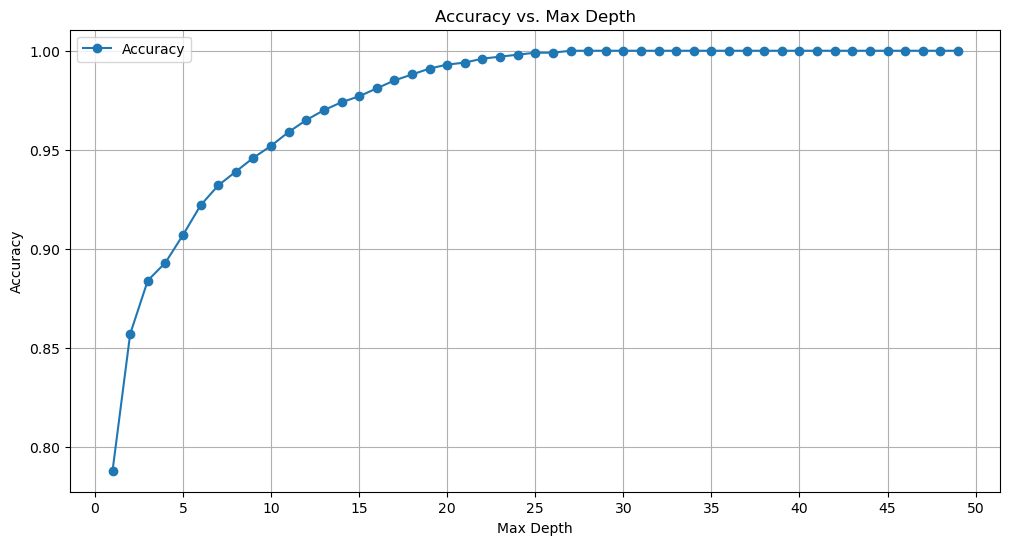

In [11]:
# Create a DataFrame from the results
results_df = pd.DataFrame(results_tree)

# Plot accuracy as a function of max_depth
plt.figure(figsize=(12, 6))
plt.plot(results_df['Max depth'], results_df['Accuracy'], marker='o', label='Accuracy')

# Add title and labels
plt.title('Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(np.arange(0, 51, 5))
plt.grid()
plt.legend()
plt.show()

In [12]:
# Find the result with the best metrics
best_result_tree = max(results_tree, key=lambda x: (x['Accuracy'], x['Precision'], x['Recall'], x['F1-Score']))

# Store the best max_depth and corresponding metrics in variables
best_train_depth_tree = best_result_tree['Max depth']
best_train_accuracy_tree = best_result_tree['Accuracy']
best_train_precision_tree = best_result_tree['Precision']
best_train_recall_tree = best_result_tree['Recall']
best_train_f1_tree = best_result_tree['F1-Score']

# Display the best max_depth value and corresponding metrics
print(f"Best Max depth={best_train_depth_tree} "
      f"| Accuracy: {best_train_accuracy_tree}, Precision: {best_train_precision_tree}, "
      f"Recall: {best_train_recall_tree}, F1-Score: {best_train_f1_tree}")

Best Max depth=30 | Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0


### Validation dataset

In [13]:
# Retrain the model with the best max_depth for the training data
tree = tr.DecisionTreeClassifier(max_depth=best_train_depth_tree)

tree.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_tree = tree.predict(X_val)

# Calculate evaluation metrics and round to 3 decimal places
val_accuracy_tree = round(mt.accuracy_score(y_val, y_val_pred_tree), 3)
val_precision_tree = round(mt.precision_score(y_val, y_val_pred_tree), 3)
val_recall_tree = round(mt.recall_score(y_val, y_val_pred_tree), 3)
val_f1_tree = round(mt.f1_score(y_val, y_val_pred_tree), 3)

# Display the results
print(f"Accuracy: {val_accuracy_tree}, Precision: {val_precision_tree}, "
      f"Recall: {val_recall_tree}, F1-Score: {val_f1_tree}")

Accuracy: 0.943, Precision: 0.931, Recall: 0.939, F1-Score: 0.935


### Test dataset

In [14]:
# Retrain the model with the best max_depth for the training and validation data
tree = tr.DecisionTreeClassifier(max_depth=best_train_depth_tree)

X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])
    
tree.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_tree = tree.predict(X_test)

# Calculate evaluation metrics and round to 3 decimal places
test_accuracy_tree = round(mt.accuracy_score(y_test, y_test_pred_tree), 3)
test_precision_tree = round(mt.precision_score(y_test, y_test_pred_tree), 3)
test_recall_tree = round(mt.recall_score(y_test, y_test_pred_tree), 3)
test_f1_tree = round(mt.f1_score(y_test, y_test_pred_tree), 3)

# Display the results
print(f"Accuracy: {test_accuracy_tree}, Precision: {test_precision_tree}, "
      f"Recall: {test_recall_tree}, F1-Score: {test_f1_tree}")

Accuracy: 0.947, Precision: 0.938, Recall: 0.942, F1-Score: 0.94


## Random Forest

### Training dataset

In [15]:
# Define the lists of values for n_estimators and max_depth
n_estimators_values = np.arange(50, 200, 50)
depth_values_rf = np.arange(1, 30, 1)

# Lists to store the results
results_rf = []

# Nested loop to test all combinations
for n_estimators in n_estimators_values:
    for max_depth in depth_values_rf:
    
        # Instantiate the Random Forest with the current values of n_estimators and max_depth
        forest = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth)
    
        # Train the model with the training data
        forest.fit(X_train, y_train)
    
        # Make predictions on the training data
        y_train_pred_rf = forest.predict(X_train)
    
        # Calculate evaluation metrics and round to 3 decimal places
        train_accuracy_rf = round(mt.accuracy_score(y_train, y_train_pred_rf), 3)
        train_precision_rf = round(mt.precision_score(y_train, y_train_pred_rf), 3)
        train_recall_rf = round(mt.recall_score(y_train, y_train_pred_rf), 3)
        train_f1_rf = round(mt.f1_score(y_train, y_train_pred_rf), 3)
    
        # Store the results in a list
        results_rf.append({
            'n_estimators': n_estimators,
            'Max depth': max_depth,
            'Accuracy': train_accuracy_rf,
            'Precision': train_precision_rf,
            'Recall': train_recall_rf,
            'F1-Score': train_f1_rf
        })

# Display the results 
for result in results_rf:
    print(f"n_estimators={result['n_estimators']}, max_depth={result['Max depth']} "
          f"| Accuracy: {result['Accuracy']}, Precision: {result['Precision']}, "
          f"Recall: {result['Recall']}, F1-Score: {result['F1-Score']}")

n_estimators=50, max_depth=1 | Accuracy: 0.855, Precision: 0.903, Recall: 0.747, F1-Score: 0.817
n_estimators=50, max_depth=2 | Accuracy: 0.875, Precision: 0.895, Recall: 0.806, F1-Score: 0.848
n_estimators=50, max_depth=3 | Accuracy: 0.904, Precision: 0.911, Recall: 0.861, F1-Score: 0.886
n_estimators=50, max_depth=4 | Accuracy: 0.906, Precision: 0.908, Recall: 0.871, F1-Score: 0.889
n_estimators=50, max_depth=5 | Accuracy: 0.92, Precision: 0.921, Recall: 0.893, F1-Score: 0.907
n_estimators=50, max_depth=6 | Accuracy: 0.93, Precision: 0.925, Recall: 0.913, F1-Score: 0.919
n_estimators=50, max_depth=7 | Accuracy: 0.933, Precision: 0.929, Recall: 0.917, F1-Score: 0.923
n_estimators=50, max_depth=8 | Accuracy: 0.94, Precision: 0.936, Recall: 0.924, F1-Score: 0.93
n_estimators=50, max_depth=9 | Accuracy: 0.942, Precision: 0.94, Recall: 0.927, F1-Score: 0.933
n_estimators=50, max_depth=10 | Accuracy: 0.95, Precision: 0.949, Recall: 0.934, F1-Score: 0.941
n_estimators=50, max_depth=11 | Acc

In [16]:
# Find the result with the best metrics
best_result_rf = max(results_rf, key=lambda x: (x['Accuracy'], x['Precision'], x['Recall'], x['F1-Score']))

# Store the best n_estimators and max_depth and their corresponding metrics in variables
best_train_n_estimators_rf = best_result_rf['n_estimators']
best_train_depth_rf = best_result_rf['Max depth']
best_train_accuracy_rf = best_result_rf['Accuracy']
best_train_precision_rf = best_result_rf['Precision']
best_train_recall_rf = best_result_rf['Recall']
best_train_f1_rf = best_result_rf['F1-Score']

# Display the best values of n_estimators and max_depth and their corresponding metrics
print(f"Best n_estimators={best_train_n_estimators_rf}, Max depth={best_train_depth_rf} "
      f"| Accuracy: {best_train_accuracy_rf}, Precision: {best_train_precision_rf}, "
      f"Recall: {best_train_recall_rf}, F1-Score: {best_train_f1_rf}")

Best n_estimators=50, Max depth=28 | Accuracy: 1.0, Precision: 1.0, Recall: 1.0, F1-Score: 1.0


### Validation dataset

In [19]:
# Re-train the model with the best n_estimators and max_depth for the training data
forest = RandomForestClassifier(n_estimators=best_train_n_estimators_rf, max_depth=best_train_depth_rf)
forest.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_rf = forest.predict(X_val)

# Calculate evaluation metrics and round to 3 decimal places
val_accuracy_rf = round(mt.accuracy_score(y_val, y_val_pred_rf), 3)
val_precision_rf = round(mt.precision_score(y_val, y_val_pred_rf), 3)
val_recall_rf = round(mt.recall_score(y_val, y_val_pred_rf), 3)
val_f1_rf = round(mt.f1_score(y_val, y_val_pred_rf), 3)

# Display the results
print(f"Accuracy: {val_accuracy_rf}, Precision: {val_precision_rf}, "
      f"Recall: {val_recall_rf}, F1-Score: {val_f1_rf}")

Accuracy: 0.961, Precision: 0.97, Recall: 0.94, F1-Score: 0.955


### Test dataset

In [20]:
# Re-train the model with the best n_estimators and max_depth for the training and validation data
forest = RandomForestClassifier(n_estimators=best_train_n_estimators_rf, max_depth=best_train_depth_rf)

# Combine the training and validation data
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Train the model with the combined data
forest.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_rf = forest.predict(X_test)

# Calculate evaluation metrics and round to 3 decimal places
test_accuracy_rf = round(mt.accuracy_score(y_test, y_test_pred_rf), 3)
test_precision_rf = round(mt.precision_score(y_test, y_test_pred_rf), 3)
test_recall_rf = round(mt.recall_score(y_test, y_test_pred_rf), 3)
test_f1_rf = round(mt.f1_score(y_test, y_test_pred_rf), 3)

# Display the results
print(f"Accuracy: {test_accuracy_rf}, Precision: {test_precision_rf}, "
      f"Recall: {test_recall_rf}, F1-Score: {test_f1_rf}")


Accuracy: 0.962, Precision: 0.972, Recall: 0.942, F1-Score: 0.957


## Logistic Regression

### Training dataset

In [21]:
# Define the lists of values for C, solver, and max_iter
C_values = np.arange(1, 5, 1)
max_iter_values = np.arange(100, 500, 100)
solver_values = ['lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga']

# Lists to store the results
results_lr = []

# Nested loop to test all combinations
for C in C_values:
    for max_iter in max_iter_values:
        for solver in solver_values:
            
            # Instantiate the Logistic Regression with the current values of C, max_iter, and solver
            logistic_model = LogisticRegression(C=C, max_iter=max_iter, solver=solver)

            # Train the model with the training data
            logistic_model.fit(X_train, y_train)
    
            # Make predictions on the training data
            y_train_pred_lr = logistic_model.predict(X_train)
    
            # Calculate evaluation metrics and round to 3 decimal places
            train_accuracy_lr = round(mt.accuracy_score(y_train, y_train_pred_lr), 3)
            train_precision_lr = round(mt.precision_score(y_train, y_train_pred_lr), 3)
            train_recall_lr = round(mt.recall_score(y_train, y_train_pred_lr), 3)
            train_f1_lr = round(mt.f1_score(y_train, y_train_pred_lr), 3)
    
            # Store the results in a list
            results_lr.append({
                'C': C,
                'Max iter': max_iter,
                'Solver': solver,
                'Accuracy': train_accuracy_lr,
                'Precision': train_precision_lr,
                'Recall': train_recall_lr,
                'F1-Score': train_f1_lr
            })

# Display the results 
for result in results_lr:
    print(f"C={result['C']}, max_iter={result['Max iter']}, solver={result['Solver']} "
          f"| Accuracy: {result['Accuracy']}, Precision: {result['Precision']}, "
          f"Recall: {result['Recall']}, F1-Score: {result['F1-Score']}")

C:\Users\rafae\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
C:\Users\rafae\anaconda3\lib\site-packages\sklearn\linear_model\_sag.py:349: ConvergenceWarning: The max_iter 

C=1, max_iter=100, solver=lbfgs | Accuracy: 0.875, Precision: 0.871, Recall: 0.836, F1-Score: 0.853
C=1, max_iter=100, solver=liblinear | Accuracy: 0.875, Precision: 0.871, Recall: 0.836, F1-Score: 0.853
C=1, max_iter=100, solver=newton-cg | Accuracy: 0.875, Precision: 0.871, Recall: 0.836, F1-Score: 0.853
C=1, max_iter=100, solver=newton-cholesky | Accuracy: 0.875, Precision: 0.871, Recall: 0.836, F1-Score: 0.853
C=1, max_iter=100, solver=sag | Accuracy: 0.875, Precision: 0.871, Recall: 0.836, F1-Score: 0.853
C=1, max_iter=100, solver=saga | Accuracy: 0.875, Precision: 0.871, Recall: 0.836, F1-Score: 0.853
C=1, max_iter=200, solver=lbfgs | Accuracy: 0.875, Precision: 0.871, Recall: 0.836, F1-Score: 0.853
C=1, max_iter=200, solver=liblinear | Accuracy: 0.875, Precision: 0.871, Recall: 0.836, F1-Score: 0.853
C=1, max_iter=200, solver=newton-cg | Accuracy: 0.875, Precision: 0.871, Recall: 0.836, F1-Score: 0.853
C=1, max_iter=200, solver=newton-cholesky | Accuracy: 0.875, Precision: 0.871

In [22]:
# Find the result with the best metrics
best_result_lr = max(results_lr, key=lambda x: (x['Accuracy'], x['Precision'], x['Recall'], x['F1-Score']))

# Store the best C, max_iter, and solver along with the corresponding metrics in variables
best_train_c_lr = best_result_lr['C']
best_train_max_iter_lr = best_result_lr['Max iter']
best_train_solver_lr = best_result_lr['Solver']
best_train_accuracy_lr = best_result_lr['Accuracy']
best_train_precision_lr = best_result_lr['Precision']
best_train_recall_lr = best_result_lr['Recall']
best_train_f1_lr = best_result_lr['F1-Score']

# Display the best C, max_iter, and solver along with the corresponding metrics
print(f"Best C={best_train_c_lr}, Max iter={best_train_max_iter_lr}, Solver={best_train_solver_lr} "
      f"| Accuracy: {best_train_accuracy_lr}, Precision: {best_train_precision_lr}, "
      f"Recall: {best_train_recall_lr}, F1-Score: {best_train_f1_lr}")

Best C=2, Max iter=100, Solver=newton-cg | Accuracy: 0.875, Precision: 0.871, Recall: 0.837, F1-Score: 0.853


### Validation dataset

In [23]:
# Re-train the model with the best C, max_iter, and solver for the training data
logistic_model = LogisticRegression(C=best_train_c_lr, max_iter=best_train_max_iter_lr, solver=best_train_solver_lr)

logistic_model.fit(X_train, y_train)

# Make predictions on the validation data
y_val_pred_lr = logistic_model.predict(X_val)

# Calculate the evaluation metrics and round to 3 decimal places
val_accuracy_lr = round(mt.accuracy_score(y_val, y_val_pred_lr), 3)
val_precision_lr = round(mt.precision_score(y_val, y_val_pred_lr), 3)
val_recall_lr = round(mt.recall_score(y_val, y_val_pred_lr), 3)
val_f1_lr = round(mt.f1_score(y_val, y_val_pred_lr), 3)

# Display the results
print(f"Accuracy: {val_accuracy_lr}, Precision: {val_precision_lr}, "
      f"Recall: {val_recall_lr}, F1-Score: {val_f1_lr}")


Accuracy: 0.874, Precision: 0.869, Recall: 0.835, F1-Score: 0.852


### Test dataset

In [24]:
# Re-train the model with the best C, max_iter, and solver for the training and validation data
logistic_model = LogisticRegression(C=best_train_c_lr, max_iter=best_train_max_iter_lr, solver=best_train_solver_lr)

# Combine the training and validation data
X_train_val = pd.concat([X_train, X_val])
y_train_val = pd.concat([y_train, y_val])

# Train the model with the combined data
logistic_model.fit(X_train_val, y_train_val)

# Make predictions on the test data
y_test_pred_lr = logistic_model.predict(X_test)

# Calculate the evaluation metrics and round to 3 decimal places
test_accuracy_lr = round(mt.accuracy_score(y_test, y_test_pred_lr), 3)
test_precision_lr = round(mt.precision_score(y_test, y_test_pred_lr), 3)
test_recall_lr = round(mt.recall_score(y_test, y_test_pred_lr), 3)
test_f1_lr = round(mt.f1_score(y_test, y_test_pred_lr), 3)

# Display the results
print(f"Accuracy: {test_accuracy_lr}, Precision: {test_precision_lr}, "
      f"Recall: {test_recall_lr}, F1-Score: {test_f1_lr}")

Accuracy: 0.871, Precision: 0.868, Recall: 0.833, F1-Score: 0.85


## Generating image for all classification experiments

### Training

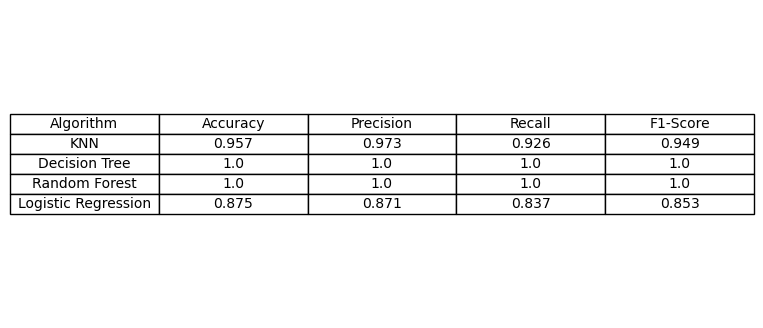

In [33]:
# Training data for each algorithm
train_algorithms = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']

train_accuracy = [best_train_accuracy_knn, best_train_accuracy_tree, best_train_accuracy_rf, best_train_accuracy_lr]
train_precision = [best_train_precision_knn, best_train_precision_tree, best_train_precision_rf, best_train_precision_lr]
train_recall = [best_train_recall_knn, best_train_recall_tree, best_train_recall_rf, best_train_recall_lr]
train_f1_score = [best_train_f1_knn, best_train_f1_tree, best_train_f1_rf, best_train_f1_lr]

# Create a DataFrame with the data
train_data = {
    'Algorithm': train_algorithms,
    'Accuracy': train_accuracy,
    'Precision': train_precision,
    'Recall': train_recall,
    'F1-Score': train_f1_score
}

df_train = pd.DataFrame(train_data)

# Create the table as a figure
fig, ax = plt.subplots(figsize=(8, 4))  # Set the figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_train.values, colLabels=df_train.columns, cellLoc='center', loc='center')

# Adjust the font size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust cell size

# Save the image
plt.savefig("algorithm_metrics_train.png", bbox_inches='tight', dpi=300)

# Display the image
plt.show()

### Validation

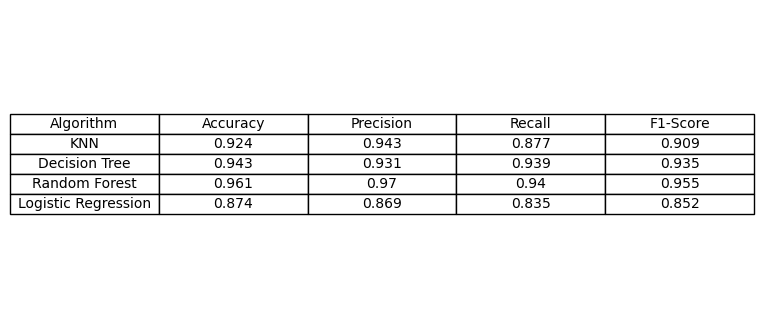

In [34]:
# Validation data for each algorithm
val_algorithms = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']

val_accuracy = [val_accuracy_knn, val_accuracy_tree, val_accuracy_rf, val_accuracy_lr]
val_precision = [val_precision_knn, val_precision_tree, val_precision_rf, val_precision_lr]
val_recall = [val_recall_knn, val_recall_tree, val_recall_rf, val_recall_lr]
val_f1_score = [val_f1_knn, val_f1_tree, val_f1_rf, val_f1_lr]

# Create a DataFrame with the data
val_data = {
    'Algorithm': val_algorithms,
    'Accuracy': val_accuracy,
    'Precision': val_precision,
    'Recall': val_recall,
    'F1-Score': val_f1_score
}

df_val = pd.DataFrame(val_data)

# Create the table as a figure
fig, ax = plt.subplots(figsize=(8, 4))  # Set the figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_val.values, colLabels=df_val.columns, cellLoc='center', loc='center')

# Adjust the font size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust cell size

# Save the image
plt.savefig("algorithm_metrics_val.png", bbox_inches='tight', dpi=300)

# Display the image
plt.show()

### Test

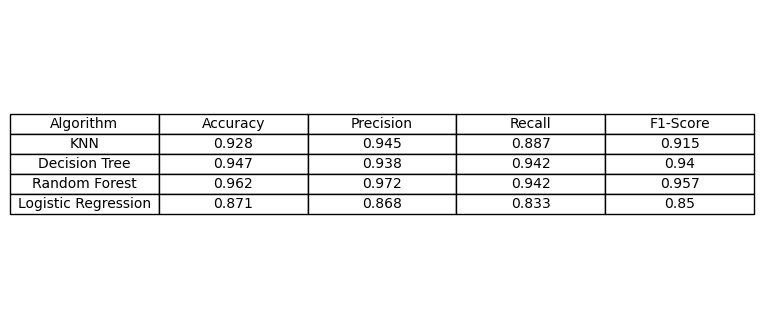

In [35]:
# Test data for each algorithm
test_algorithms = ['KNN', 'Decision Tree', 'Random Forest', 'Logistic Regression']

test_accuracy = [test_accuracy_knn, test_accuracy_tree, test_accuracy_rf, test_accuracy_lr]
test_precision = [test_precision_knn, test_precision_tree, test_precision_rf, test_precision_lr]
test_recall = [test_recall_knn, test_recall_tree, test_recall_rf, test_recall_lr]
test_f1_score = [test_f1_knn, test_f1_tree, test_f1_rf, test_f1_lr]

# Create a DataFrame with the data
test_data = {
    'Algorithm': test_algorithms,
    'Accuracy': test_accuracy,
    'Precision': test_precision,
    'Recall': test_recall,
    'F1-Score': test_f1_score
}

df_test = pd.DataFrame(test_data)

# Create the table as a figure
fig, ax = plt.subplots(figsize=(8, 4))  # Set the figure size
ax.axis('tight')
ax.axis('off')
table = ax.table(cellText=df_test.values, colLabels=df_test.columns, cellLoc='center', loc='center')

# Adjust the font size of the table
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)  # Adjust cell size

# Save the image
plt.savefig("algorithm_metrics_test.png", bbox_inches='tight', dpi=300)

# Display the image
plt.show()